In [253]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [327]:
# Load data
train_data = pd.read_csv('train.csv', dtype = {'target' : np.uint8})

test_data = pd.read_csv('test.csv')

song = pd.read_csv('songs.csv')

member = pd.read_csv('members.csv', dtype={'bd' : np.uint8})

extra = pd.read_csv('song_extra_info.csv')

In [328]:
train_data.head()

msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore  online-playlist       1

In [329]:
test_data.head()

id                                          msno  \
0   0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1   1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2   2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3   3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4   4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          discover   
3  ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4  MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   

    source_screen_name          source_type  
0  Local playlist more        local-library  
1  Local playlist more        local-library  
2                  NaN  song-based-playlist  
3                Radio                radio  
4                Radio                radio

In [330]:
song.head()

song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0

In [331]:
member.head()

msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613

In [332]:
extra.head()

song_id             name          isrc
0  LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=               我們  TWUM71200043
1  ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=  Let Me Love You  QMZSY1600015
2  u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=              原諒我  TWA530887303
3  92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=          Classic  USSM11301446
4  0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=             愛投羅網  TWA471306001

Text(0.5, 1.0, 'Test set Missing Value Count')

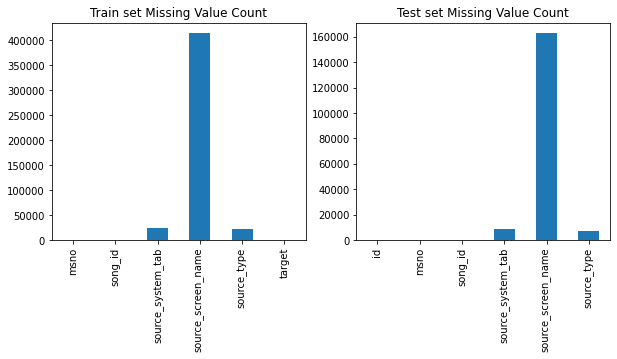

In [333]:
# Data virtulization
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
train_data.isnull().sum().plot(kind='bar')
plt.title('Train set Missing Value Count')
plt.subplot(1, 2, 2)
test_data.isnull().sum().plot(kind='bar')
plt.title('Test set Missing Value Count')

Text(0.5, 1.0, 'Member Missing Value Count')

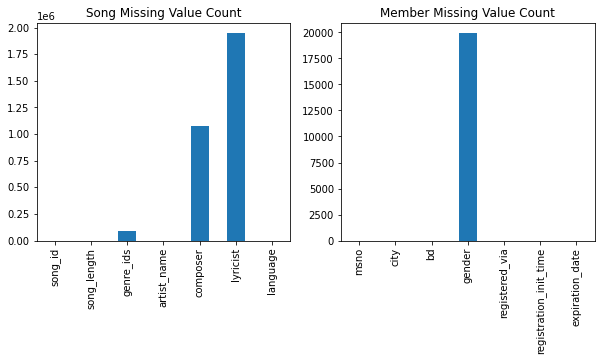

In [334]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
song.isnull().sum().plot(kind='bar')
plt.title('Song Missing Value Count')
plt.subplot(1, 2, 2)
member.isnull().sum().plot(kind='bar')
plt.title('Member Missing Value Count')

Text(0.5, 1.0, 'Extra info Missing Value Count')

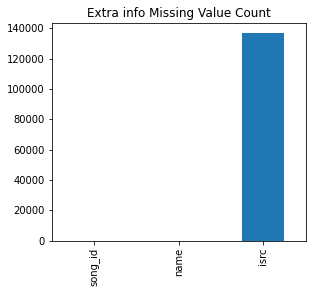

In [335]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
extra.isnull().sum().plot(kind='bar')
plt.title('Extra info Missing Value Count')

[Text(0.5, 0, 'Year old')]

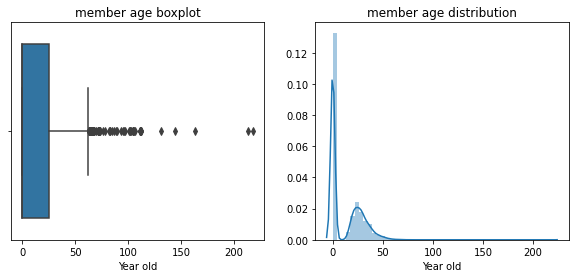

In [336]:
# Data preprocessing
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(member.bd)
sns.boxplot(x,ax=axs[0])
axs[0].set_title('member age boxplot')
axs[0].set(xlabel='Year old')
sns.distplot(x,ax=axs[1])
axs[1].set_title('member age distribution')
axs[1].set(xlabel='Year old')

In [337]:
# Replace outlier age with medium age
median = member.loc[(member['bd'])<100 & (member['bd']>0), 'bd'].median()
member.loc[(member.bd > 100), 'bd'] = np.nan
member.loc[(member.bd == 0), 'bd'] = np.nan
member.bd.fillna(median,inplace=True)

[Text(0.5, 0, 'Year old')]

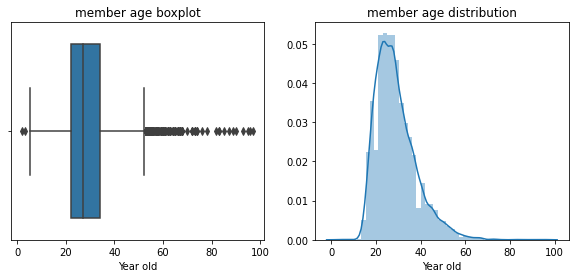

In [338]:
# New age plots
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(member.bd)
sns.boxplot(x,ax=axs[0])
axs[0].set_title('member age boxplot')
axs[0].set(xlabel='Year old')
sns.distplot(x,ax=axs[1])
axs[1].set_title('member age distribution')
axs[1].set(xlabel='Year old')

[Text(0.5, 0, 'Index')]

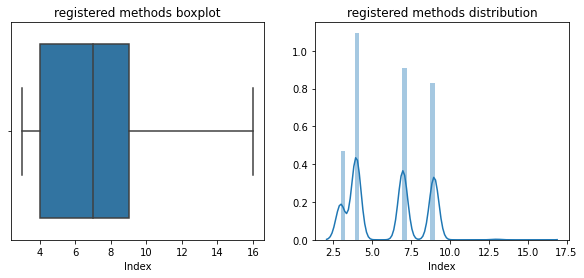

In [339]:
# registered methods
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(member.registered_via)
sns.boxplot(x,ax=axs[0])
axs[0].set_title('registered methods boxplot')
axs[0].set(xlabel='Index')
sns.distplot(x,ax=axs[1])
axs[1].set_title('registered methods distribution')
axs[1].set(xlabel='Index')

[Text(0.5, 0, 'Time')]

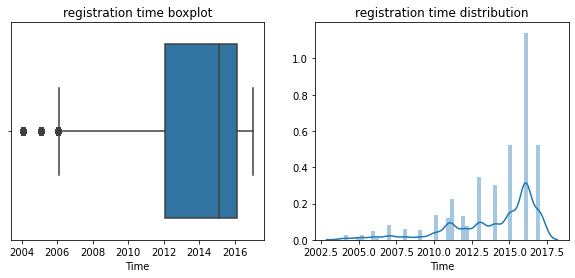

In [340]:
# registration time
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(member.registration_init_time/1e4)
sns.boxplot(x,ax=axs[0])
axs[0].set_title('registration time boxplot')
axs[0].set(xlabel='Time')
sns.distplot(x,ax=axs[1])
axs[1].set_title('registration time distribution')
axs[1].set(xlabel='Time')

[Text(0.5, 0, 'Time')]

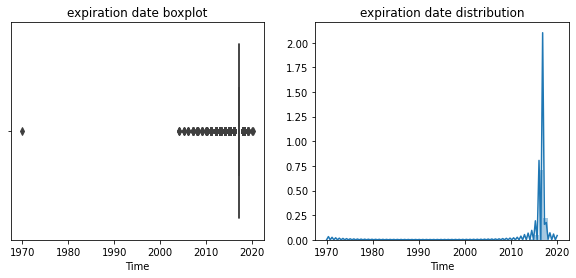

In [341]:
# expiration time
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(member.expiration_date/1e4)
sns.boxplot(x,ax=axs[0])
axs[0].set_title('expiration date boxplot')
axs[0].set(xlabel='Time')
sns.distplot(x,ax=axs[1])
axs[1].set_title('expiration date distribution')
axs[1].set(xlabel='Time')

In [342]:
# replace outlier with its corresponding registration time
member.loc[(member.expiration_date < member.registration_init_time), 'expiration_date'] = member.registration_init_time+1


[Text(0.5, 0, 'Time')]

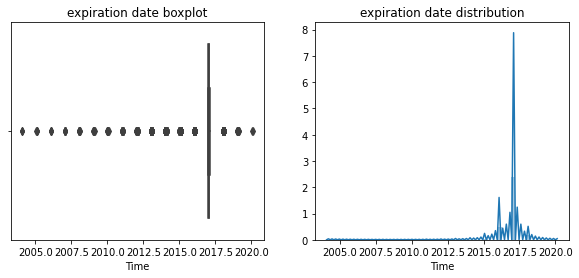

In [343]:
# expiration time processed
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(member.expiration_date/1e4)
sns.boxplot(x,ax=axs[0])
axs[0].set_title('expiration date boxplot')
axs[0].set(xlabel='Time')
sns.distplot(x,ax=axs[1])
axs[1].set_title('expiration date distribution')
axs[1].set(xlabel='Time')

[Text(0.5, 0, 'Second')]

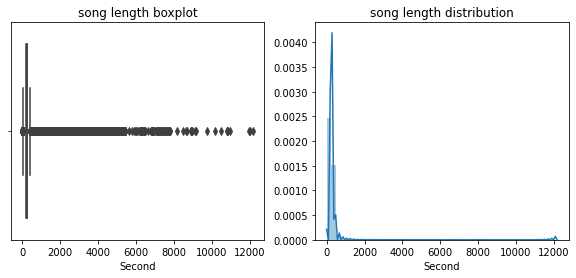

In [344]:
# Song length
fig, axs = plt.subplots(figsize = (10,4), ncols=2)
x = np.array(song.song_length/(1000))
sns.boxplot(x,ax=axs[0])
axs[0].set_title('song length boxplot')
axs[0].set(xlabel='Second')
sns.distplot(x,ax=axs[1])
axs[1].set_title('song length distribution')
axs[1].set(xlabel='Second')

In [345]:
# merge extra song info into train and test datasets
train = train_data
test = test_data
train = train.merge(extra, on='song_id', how='left')
test = test.merge(extra, on='song_id', how='left')

In [346]:
# merge member info into train and test datasets
train = train.merge(member, on='msno', how='left')
test = test.merge(member, on='msno', how='left')

In [347]:
# merge song info into train and test sets
train = train.merge(song, on='song_id', how='left')
test = test.merge(song, on='song_id', how='left')

In [348]:
# Convert object type to category, fill NA value
for col in train.drop('target', axis = 1).columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna('unknown') # fill na as unknown
        test[col] = test[col].fillna('unknown')
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')
    elif col == 'bd' or col == 'song_length':
        train[col] = train[col].fillna(train[col].median())
        test[col] = test[col].fillna(test[col].median())
    else:
        train[col] = train[col].fillna(0)
        test[col] = test[col].fillna(0)

In [349]:
train.dtypes

msno                      category
song_id                   category
source_system_tab         category
source_screen_name        category
source_type               category
target                       uint8
name                      category
isrc                      category
city                         int64
bd                         float64
gender                    category
registered_via               int64
registration_init_time       int64
expiration_date              int64
song_length                float64
genre_ids                 category
artist_name               category
composer                  category
lyricist                  category
language                   float64
dtype: object

In [350]:
train.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
dtype: int64

In [351]:
# Prepare train sets
X = train.drop('target', axis = 1)
y = train.target.values

In [370]:
%%time
# lgbm training
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

lgbm = lgb.LGBMClassifier(application = 'binary',
                          metric = 'auc',
                          learning_rate = 0.2,
                          max_depth = 8,
                          num_leaves = 2**8,
                          num_iterations = 2000)
lgbm.fit(X_train, y_train, eval_set=(X_validation, y_validation), verbose = 100)

#save model
filename = 'lgbm.sav'
joblib.dump(lgbm, filename)

[100]	valid_0's auc: 0.757546
[200]	valid_0's auc: 0.772358
[300]	valid_0's auc: 0.780922
[400]	valid_0's auc: 0.788159
[500]	valid_0's auc: 0.793927
[600]	valid_0's auc: 0.797344
[700]	valid_0's auc: 0.800508
[800]	valid_0's auc: 0.80311
[900]	valid_0's auc: 0.805031
[1000]	valid_0's auc: 0.806813
[1100]	valid_0's auc: 0.808876
[1200]	valid_0's auc: 0.810139
[1300]	valid_0's auc: 0.8114
[1400]	valid_0's auc: 0.812682
[1500]	valid_0's auc: 0.813769
[1600]	valid_0's auc: 0.814587
[1700]	valid_0's auc: 0.815529
[1800]	valid_0's auc: 0.816366
[1900]	valid_0's auc: 0.817119
[2000]	valid_0's auc: 0.818047
CPU times: user 54min 34s, sys: 32.1 s, total: 55min 6s
Wall time: 10min 15s


['lgbm.sav']

In [365]:
X_test = test.drop('id', axis = 1)
y_test = lgbm.predict_proba(X_test)[:,-1]

In [366]:
result_lgbm = pd.DataFrame()
result_lgbm['id'] = test['id'].values

In [367]:
result_lgbm['target'] = y_test

In [368]:
result_lgbm.to_csv('submission_lgbm_V4.csv', index= False, float_format = '%.5f')

In [243]:
%%time
# catboost training

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

cat_features_names = [col for col in X.columns if X[col].dtype.name == 'category']
cat_features = [X.columns.get_loc(col) for col in cat_features_names]
SEED = 1
params = {'loss_function':'Logloss',
          'iterations' : 2000,
          'eval_metric':'AUC',
          'boosting_type' : 'Plain',
          'leaf_estimation_iterations' : 1,
          #'task_type' : 'GPU',
          'cat_features': cat_features,
          'early_stopping_rounds': 100,
          'verbose': True,
          'random_seed': SEED
         }
cb = CatBoostClassifier(**params)

cb.fit(X_train, y_train, 
       eval_set=(X_validation, y_validation),
       plot=True)

#save model
filename = 'catboost.sav'
joblib.dump(cb, filename)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7777673	best: 0.7777673 (0)	total: 11.9s	remaining: 6h 38m 6s
1:	test: 0.7795648	best: 0.7795648 (1)	total: 14.3s	remaining: 3h 58m 52s
2:	test: 0.7823815	best: 0.7823815 (2)	total: 25.1s	remaining: 4h 38m 28s
3:	test: 0.7860890	best: 0.7860890 (3)	total: 38.6s	remaining: 5h 20m 55s
4:	test: 0.7893069	best: 0.7893069 (4)	total: 49.3s	remaining: 5h 28m 7s
5:	test: 0.7918603	best: 0.7918603 (5)	total: 52.4s	remaining: 4h 50m 5s
6:	test: 0.7928360	best: 0.7928360 (6)	total: 56.5s	remaining: 4h 28m 18s
7:	test: 0.7930998	best: 0.7930998 (7)	total: 59.6s	remaining: 4h 7m 26s
8:	test: 0.7935130	best: 0.7935130 (8)	total: 1m 1s	remaining: 3h 48m 28s
9:	test: 0.7942437	best: 0.7942437 (9)	total: 1m 4s	remaining: 3h 33m 21s
10:	test: 0.7946870	best: 0.7946870 (10)	total: 1m 6s	remaining: 3h 21m
11:	test: 0.7948502	best: 0.7948502 (11)	total: 1m 10s	remaining: 3h 13m 53s
12:	test: 0.7953134	best: 0.7953134 (12)	total: 1m 17s	remaining: 3h 18m 12s
13:	test: 0.7960632	best: 0.7960632 (1

108:	test: 0.8327844	best: 0.8327844 (108)	total: 16m 48s	remaining: 4h 51m 30s
109:	test: 0.8328542	best: 0.8328542 (109)	total: 16m 55s	remaining: 4h 50m 39s
110:	test: 0.8329411	best: 0.8329411 (110)	total: 17m 7s	remaining: 4h 51m 32s
111:	test: 0.8330084	best: 0.8330084 (111)	total: 17m 22s	remaining: 4h 52m 49s
112:	test: 0.8330927	best: 0.8330927 (112)	total: 17m 34s	remaining: 4h 53m 29s
113:	test: 0.8331571	best: 0.8331571 (113)	total: 17m 45s	remaining: 4h 53m 55s
114:	test: 0.8332161	best: 0.8332161 (114)	total: 17m 59s	remaining: 4h 55m 1s
115:	test: 0.8333180	best: 0.8333180 (115)	total: 18m 12s	remaining: 4h 55m 49s
116:	test: 0.8333648	best: 0.8333648 (116)	total: 18m 23s	remaining: 4h 56m 2s
117:	test: 0.8334497	best: 0.8334497 (117)	total: 18m 33s	remaining: 4h 56m 2s
118:	test: 0.8335273	best: 0.8335273 (118)	total: 18m 45s	remaining: 4h 56m 32s
119:	test: 0.8335759	best: 0.8335759 (119)	total: 18m 58s	remaining: 4h 57m 15s
120:	test: 0.8336191	best: 0.8336191 (120)	t

212:	test: 0.8386168	best: 0.8386168 (212)	total: 37m 45s	remaining: 5h 16m 46s
213:	test: 0.8386724	best: 0.8386724 (213)	total: 37m 56s	remaining: 5h 16m 42s
214:	test: 0.8387245	best: 0.8387245 (214)	total: 38m 8s	remaining: 5h 16m 42s
215:	test: 0.8387558	best: 0.8387558 (215)	total: 38m 19s	remaining: 5h 16m 34s
216:	test: 0.8387752	best: 0.8387752 (216)	total: 38m 31s	remaining: 5h 16m 33s
217:	test: 0.8388029	best: 0.8388029 (217)	total: 38m 39s	remaining: 5h 15m 59s
218:	test: 0.8388363	best: 0.8388363 (218)	total: 38m 49s	remaining: 5h 15m 48s
219:	test: 0.8388768	best: 0.8388768 (219)	total: 39m	remaining: 5h 15m 35s
220:	test: 0.8389203	best: 0.8389203 (220)	total: 39m 10s	remaining: 5h 15m 18s
221:	test: 0.8389493	best: 0.8389493 (221)	total: 39m 20s	remaining: 5h 15m 3s
222:	test: 0.8389872	best: 0.8389872 (222)	total: 39m 31s	remaining: 5h 14m 54s
223:	test: 0.8390085	best: 0.8390085 (223)	total: 39m 45s	remaining: 5h 15m 12s
224:	test: 0.8390486	best: 0.8390486 (224)	tot

317:	test: 0.8415039	best: 0.8415039 (317)	total: 56m 35s	remaining: 4h 59m 19s
318:	test: 0.8415329	best: 0.8415329 (318)	total: 56m 46s	remaining: 4h 59m 13s
319:	test: 0.8415589	best: 0.8415589 (319)	total: 56m 59s	remaining: 4h 59m 14s
320:	test: 0.8415674	best: 0.8415674 (320)	total: 57m 6s	remaining: 4h 58m 42s
321:	test: 0.8415894	best: 0.8415894 (321)	total: 57m 16s	remaining: 4h 58m 27s
322:	test: 0.8416065	best: 0.8416065 (322)	total: 57m 29s	remaining: 4h 58m 28s
323:	test: 0.8416208	best: 0.8416208 (323)	total: 57m 39s	remaining: 4h 58m 15s
324:	test: 0.8416364	best: 0.8416364 (324)	total: 57m 43s	remaining: 4h 57m 31s
325:	test: 0.8416596	best: 0.8416596 (325)	total: 57m 57s	remaining: 4h 57m 36s
326:	test: 0.8416748	best: 0.8416748 (326)	total: 58m 7s	remaining: 4h 57m 23s
327:	test: 0.8416886	best: 0.8416886 (327)	total: 58m 19s	remaining: 4h 57m 19s
328:	test: 0.8417011	best: 0.8417011 (328)	total: 58m 29s	remaining: 4h 57m 5s
329:	test: 0.8417219	best: 0.8417219 (329)	

418:	test: 0.8430987	best: 0.8430987 (418)	total: 1h 15m	remaining: 4h 43m 2s
419:	test: 0.8431230	best: 0.8431230 (419)	total: 1h 15m 16s	remaining: 4h 43m 11s
420:	test: 0.8431408	best: 0.8431408 (420)	total: 1h 15m 30s	remaining: 4h 43m 11s
421:	test: 0.8431591	best: 0.8431591 (421)	total: 1h 15m 43s	remaining: 4h 43m 8s
422:	test: 0.8431736	best: 0.8431736 (422)	total: 1h 15m 55s	remaining: 4h 43m 2s
423:	test: 0.8431802	best: 0.8431802 (423)	total: 1h 16m 4s	remaining: 4h 42m 47s
424:	test: 0.8431952	best: 0.8431952 (424)	total: 1h 16m 16s	remaining: 4h 42m 38s
425:	test: 0.8432043	best: 0.8432043 (425)	total: 1h 16m 25s	remaining: 4h 42m 21s
426:	test: 0.8432260	best: 0.8432260 (426)	total: 1h 16m 37s	remaining: 4h 42m 16s
427:	test: 0.8432289	best: 0.8432289 (427)	total: 1h 16m 44s	remaining: 4h 41m 53s
428:	test: 0.8432436	best: 0.8432436 (428)	total: 1h 16m 56s	remaining: 4h 41m 45s
429:	test: 0.8432592	best: 0.8432592 (429)	total: 1h 17m 10s	remaining: 4h 41m 48s
430:	test: 0

518:	test: 0.8442099	best: 0.8442099 (518)	total: 1h 34m 25s	remaining: 4h 29m 27s
519:	test: 0.8442182	best: 0.8442182 (519)	total: 1h 34m 35s	remaining: 4h 29m 13s
520:	test: 0.8442376	best: 0.8442376 (520)	total: 1h 34m 46s	remaining: 4h 29m 2s
521:	test: 0.8442532	best: 0.8442532 (521)	total: 1h 35m	remaining: 4h 29m 1s
522:	test: 0.8442589	best: 0.8442589 (522)	total: 1h 35m 12s	remaining: 4h 28m 52s
523:	test: 0.8442628	best: 0.8442628 (523)	total: 1h 35m 22s	remaining: 4h 28m 40s
524:	test: 0.8442730	best: 0.8442730 (524)	total: 1h 35m 37s	remaining: 4h 28m 40s
525:	test: 0.8442922	best: 0.8442922 (525)	total: 1h 35m 51s	remaining: 4h 28m 37s
526:	test: 0.8443069	best: 0.8443069 (526)	total: 1h 36m	remaining: 4h 28m 21s
527:	test: 0.8443122	best: 0.8443122 (527)	total: 1h 36m 11s	remaining: 4h 28m 10s
528:	test: 0.8443209	best: 0.8443209 (528)	total: 1h 36m 22s	remaining: 4h 27m 58s
529:	test: 0.8443266	best: 0.8443266 (529)	total: 1h 36m 30s	remaining: 4h 27m 39s
530:	test: 0.8

618:	test: 0.8451483	best: 0.8451483 (618)	total: 1h 54m 10s	remaining: 4h 14m 42s
619:	test: 0.8451515	best: 0.8451515 (619)	total: 1h 54m 19s	remaining: 4h 14m 28s
620:	test: 0.8451632	best: 0.8451632 (620)	total: 1h 54m 29s	remaining: 4h 14m 13s
621:	test: 0.8451726	best: 0.8451726 (621)	total: 1h 54m 43s	remaining: 4h 14m 8s
622:	test: 0.8451797	best: 0.8451797 (622)	total: 1h 54m 52s	remaining: 4h 13m 53s
623:	test: 0.8451920	best: 0.8451920 (623)	total: 1h 55m 2s	remaining: 4h 13m 41s
624:	test: 0.8452023	best: 0.8452023 (624)	total: 1h 55m 14s	remaining: 4h 13m 31s
625:	test: 0.8452110	best: 0.8452110 (625)	total: 1h 55m 27s	remaining: 4h 13m 25s
626:	test: 0.8452176	best: 0.8452176 (626)	total: 1h 55m 37s	remaining: 4h 13m 11s
627:	test: 0.8452321	best: 0.8452321 (627)	total: 1h 55m 48s	remaining: 4h 13m
628:	test: 0.8452360	best: 0.8452360 (628)	total: 1h 55m 57s	remaining: 4h 12m 45s
629:	test: 0.8452456	best: 0.8452456 (629)	total: 1h 56m 9s	remaining: 4h 12m 36s
630:	test: 

719:	test: 0.8458889	best: 0.8458889 (719)	total: 2h 13m 53s	remaining: 3h 58m 2s
720:	test: 0.8458919	best: 0.8458919 (720)	total: 2h 14m 1s	remaining: 3h 57m 44s
721:	test: 0.8458975	best: 0.8458975 (721)	total: 2h 14m 13s	remaining: 3h 57m 34s
722:	test: 0.8459061	best: 0.8459061 (722)	total: 2h 14m 28s	remaining: 3h 57m 31s
723:	test: 0.8459138	best: 0.8459138 (723)	total: 2h 14m 36s	remaining: 3h 57m 14s
724:	test: 0.8459184	best: 0.8459184 (724)	total: 2h 14m 46s	remaining: 3h 57m
725:	test: 0.8459272	best: 0.8459272 (725)	total: 2h 14m 55s	remaining: 3h 56m 46s
726:	test: 0.8459298	best: 0.8459298 (726)	total: 2h 15m 2s	remaining: 3h 56m 27s
727:	test: 0.8459344	best: 0.8459344 (727)	total: 2h 15m 10s	remaining: 3h 56m 11s
728:	test: 0.8459397	best: 0.8459397 (728)	total: 2h 15m 22s	remaining: 3h 56m 1s
729:	test: 0.8459459	best: 0.8459459 (729)	total: 2h 15m 35s	remaining: 3h 55m 53s
730:	test: 0.8459488	best: 0.8459488 (730)	total: 2h 15m 47s	remaining: 3h 55m 43s
731:	test: 0

819:	test: 0.8464639	best: 0.8464639 (819)	total: 2h 33m 9s	remaining: 3h 40m 23s
820:	test: 0.8464689	best: 0.8464689 (820)	total: 2h 33m 20s	remaining: 3h 40m 12s
821:	test: 0.8464748	best: 0.8464748 (821)	total: 2h 33m 34s	remaining: 3h 40m 5s
822:	test: 0.8464790	best: 0.8464790 (822)	total: 2h 33m 46s	remaining: 3h 39m 54s
823:	test: 0.8464830	best: 0.8464830 (823)	total: 2h 33m 58s	remaining: 3h 39m 44s
824:	test: 0.8464888	best: 0.8464888 (824)	total: 2h 34m 11s	remaining: 3h 39m 35s
825:	test: 0.8464955	best: 0.8464955 (825)	total: 2h 34m 22s	remaining: 3h 39m 25s
826:	test: 0.8464997	best: 0.8464997 (826)	total: 2h 34m 34s	remaining: 3h 39m 14s
827:	test: 0.8465060	best: 0.8465060 (827)	total: 2h 34m 46s	remaining: 3h 39m 5s
828:	test: 0.8465089	best: 0.8465089 (828)	total: 2h 34m 58s	remaining: 3h 38m 54s
829:	test: 0.8465130	best: 0.8465130 (829)	total: 2h 35m 9s	remaining: 3h 38m 43s
830:	test: 0.8465178	best: 0.8465178 (830)	total: 2h 35m 16s	remaining: 3h 38m 25s
831:	tes

919:	test: 0.8469241	best: 0.8469241 (919)	total: 2h 52m 23s	remaining: 3h 22m 22s
920:	test: 0.8469291	best: 0.8469291 (920)	total: 2h 52m 41s	remaining: 3h 22m 19s
921:	test: 0.8469317	best: 0.8469317 (921)	total: 2h 52m 51s	remaining: 3h 22m 6s
922:	test: 0.8469339	best: 0.8469339 (922)	total: 2h 53m 1s	remaining: 3h 21m 54s
923:	test: 0.8469405	best: 0.8469405 (923)	total: 2h 53m 13s	remaining: 3h 21m 43s
924:	test: 0.8469514	best: 0.8469514 (924)	total: 2h 53m 26s	remaining: 3h 21m 33s
925:	test: 0.8469563	best: 0.8469563 (925)	total: 2h 53m 40s	remaining: 3h 21m 26s
926:	test: 0.8469614	best: 0.8469614 (926)	total: 2h 53m 53s	remaining: 3h 21m 16s
927:	test: 0.8469680	best: 0.8469680 (927)	total: 2h 54m 1s	remaining: 3h 21m 2s
928:	test: 0.8469756	best: 0.8469756 (928)	total: 2h 54m 9s	remaining: 3h 20m 47s
929:	test: 0.8469789	best: 0.8469789 (929)	total: 2h 54m 22s	remaining: 3h 20m 37s
930:	test: 0.8469892	best: 0.8469892 (930)	total: 2h 54m 34s	remaining: 3h 20m 27s
931:	test

1019:	test: 0.8474779	best: 0.8474779 (1019)	total: 3h 12m 57s	remaining: 3h 5m 23s
1020:	test: 0.8474837	best: 0.8474837 (1020)	total: 3h 13m 11s	remaining: 3h 5m 14s
1021:	test: 0.8474900	best: 0.8474900 (1021)	total: 3h 13m 24s	remaining: 3h 5m 4s
1022:	test: 0.8474918	best: 0.8474918 (1022)	total: 3h 13m 33s	remaining: 3h 4m 51s
1023:	test: 0.8474959	best: 0.8474959 (1023)	total: 3h 13m 45s	remaining: 3h 4m 40s
1024:	test: 0.8475067	best: 0.8475067 (1024)	total: 3h 13m 57s	remaining: 3h 4m 29s
1025:	test: 0.8475169	best: 0.8475169 (1025)	total: 3h 14m 10s	remaining: 3h 4m 19s
1026:	test: 0.8475252	best: 0.8475252 (1026)	total: 3h 14m 21s	remaining: 3h 4m 8s
1027:	test: 0.8475343	best: 0.8475343 (1027)	total: 3h 14m 31s	remaining: 3h 3m 56s
1028:	test: 0.8475373	best: 0.8475373 (1028)	total: 3h 14m 46s	remaining: 3h 3m 48s
1029:	test: 0.8475405	best: 0.8475405 (1029)	total: 3h 15m 4s	remaining: 3h 3m 42s
1030:	test: 0.8475452	best: 0.8475452 (1030)	total: 3h 15m 14s	remaining: 3h 3m

1117:	test: 0.8479175	best: 0.8479175 (1117)	total: 3h 33m 10s	remaining: 2h 48m 10s
1118:	test: 0.8479212	best: 0.8479212 (1118)	total: 3h 33m 24s	remaining: 2h 48m
1119:	test: 0.8479238	best: 0.8479238 (1119)	total: 3h 33m 36s	remaining: 2h 47m 49s
1120:	test: 0.8479271	best: 0.8479271 (1120)	total: 3h 33m 50s	remaining: 2h 47m 40s
1121:	test: 0.8479316	best: 0.8479316 (1121)	total: 3h 33m 59s	remaining: 2h 47m 26s
1122:	test: 0.8479384	best: 0.8479384 (1122)	total: 3h 34m 8s	remaining: 2h 47m 13s
1123:	test: 0.8479410	best: 0.8479410 (1123)	total: 3h 34m 17s	remaining: 2h 47m
1124:	test: 0.8479429	best: 0.8479429 (1124)	total: 3h 34m 27s	remaining: 2h 46m 48s
1125:	test: 0.8479475	best: 0.8479475 (1125)	total: 3h 34m 38s	remaining: 2h 46m 35s
1126:	test: 0.8479530	best: 0.8479530 (1126)	total: 3h 34m 57s	remaining: 2h 46m 30s
1127:	test: 0.8479585	best: 0.8479585 (1127)	total: 3h 35m 9s	remaining: 2h 46m 19s
1128:	test: 0.8479626	best: 0.8479626 (1128)	total: 3h 35m 21s	remaining: 2

1215:	test: 0.8483023	best: 0.8483023 (1215)	total: 3h 52m 40s	remaining: 2h 30m
1216:	test: 0.8483057	best: 0.8483057 (1216)	total: 3h 52m 54s	remaining: 2h 29m 51s
1217:	test: 0.8483083	best: 0.8483083 (1217)	total: 3h 53m 7s	remaining: 2h 29m 40s
1218:	test: 0.8483149	best: 0.8483149 (1218)	total: 3h 53m 23s	remaining: 2h 29m 31s
1219:	test: 0.8483159	best: 0.8483159 (1219)	total: 3h 53m 35s	remaining: 2h 29m 20s
1220:	test: 0.8483180	best: 0.8483180 (1220)	total: 3h 53m 49s	remaining: 2h 29m 10s
1221:	test: 0.8483196	best: 0.8483196 (1221)	total: 3h 53m 59s	remaining: 2h 28m 58s
1222:	test: 0.8483245	best: 0.8483245 (1222)	total: 3h 54m 11s	remaining: 2h 28m 47s
1223:	test: 0.8483310	best: 0.8483310 (1223)	total: 3h 54m 21s	remaining: 2h 28m 34s
1224:	test: 0.8483338	best: 0.8483338 (1224)	total: 3h 54m 35s	remaining: 2h 28m 25s
1225:	test: 0.8483345	best: 0.8483345 (1225)	total: 3h 54m 47s	remaining: 2h 28m 13s
1226:	test: 0.8483354	best: 0.8483354 (1226)	total: 3h 54m 53s	remaini

1313:	test: 0.8486323	best: 0.8486323 (1313)	total: 4h 12m 17s	remaining: 2h 11m 42s
1314:	test: 0.8486338	best: 0.8486338 (1314)	total: 4h 12m 28s	remaining: 2h 11m 30s
1315:	test: 0.8486352	best: 0.8486352 (1315)	total: 4h 12m 39s	remaining: 2h 11m 19s
1316:	test: 0.8486430	best: 0.8486430 (1316)	total: 4h 12m 50s	remaining: 2h 11m 7s
1317:	test: 0.8486467	best: 0.8486467 (1317)	total: 4h 13m 2s	remaining: 2h 10m 56s
1318:	test: 0.8486490	best: 0.8486490 (1318)	total: 4h 13m 15s	remaining: 2h 10m 45s
1319:	test: 0.8486497	best: 0.8486497 (1319)	total: 4h 13m 27s	remaining: 2h 10m 33s
1320:	test: 0.8486517	best: 0.8486517 (1320)	total: 4h 13m 36s	remaining: 2h 10m 21s
1321:	test: 0.8486550	best: 0.8486550 (1321)	total: 4h 13m 51s	remaining: 2h 10m 11s
1322:	test: 0.8486565	best: 0.8486565 (1322)	total: 4h 14m	remaining: 2h 9m 58s
1323:	test: 0.8486610	best: 0.8486610 (1323)	total: 4h 14m 13s	remaining: 2h 9m 47s
1324:	test: 0.8486625	best: 0.8486625 (1324)	total: 4h 14m 25s	remaining:

1411:	test: 0.8489421	best: 0.8489421 (1411)	total: 4h 31m 53s	remaining: 1h 53m 13s
1412:	test: 0.8489466	best: 0.8489466 (1412)	total: 4h 32m 5s	remaining: 1h 53m 2s
1413:	test: 0.8489479	best: 0.8489479 (1413)	total: 4h 32m 16s	remaining: 1h 52m 50s
1414:	test: 0.8489502	best: 0.8489502 (1414)	total: 4h 32m 29s	remaining: 1h 52m 39s
1415:	test: 0.8489524	best: 0.8489524 (1415)	total: 4h 32m 39s	remaining: 1h 52m 27s
1416:	test: 0.8489561	best: 0.8489561 (1416)	total: 4h 32m 54s	remaining: 1h 52m 16s
1417:	test: 0.8489584	best: 0.8489584 (1417)	total: 4h 33m 7s	remaining: 1h 52m 6s
1418:	test: 0.8489600	best: 0.8489600 (1418)	total: 4h 33m 19s	remaining: 1h 51m 54s
1419:	test: 0.8489641	best: 0.8489641 (1419)	total: 4h 33m 33s	remaining: 1h 51m 44s
1420:	test: 0.8489667	best: 0.8489667 (1420)	total: 4h 33m 48s	remaining: 1h 51m 33s
1421:	test: 0.8489677	best: 0.8489677 (1421)	total: 4h 34m 2s	remaining: 1h 51m 23s
1422:	test: 0.8489694	best: 0.8489694 (1422)	total: 4h 34m 13s	remaini

1508:	test: 0.8492267	best: 0.8492267 (1508)	total: 4h 51m 21s	remaining: 1h 34m 48s
1509:	test: 0.8492321	best: 0.8492321 (1509)	total: 4h 51m 36s	remaining: 1h 34m 37s
1510:	test: 0.8492339	best: 0.8492339 (1510)	total: 4h 51m 48s	remaining: 1h 34m 26s
1511:	test: 0.8492347	best: 0.8492347 (1511)	total: 4h 51m 56s	remaining: 1h 34m 13s
1512:	test: 0.8492385	best: 0.8492385 (1512)	total: 4h 52m 12s	remaining: 1h 34m 3s
1513:	test: 0.8492402	best: 0.8492402 (1513)	total: 4h 52m 19s	remaining: 1h 33m 50s
1514:	test: 0.8492494	best: 0.8492494 (1514)	total: 4h 52m 31s	remaining: 1h 33m 38s
1515:	test: 0.8492544	best: 0.8492544 (1515)	total: 4h 52m 44s	remaining: 1h 33m 27s
1516:	test: 0.8492596	best: 0.8492596 (1516)	total: 4h 52m 57s	remaining: 1h 33m 16s
1517:	test: 0.8492652	best: 0.8492652 (1517)	total: 4h 53m 6s	remaining: 1h 33m 4s
1518:	test: 0.8492663	best: 0.8492663 (1518)	total: 4h 53m 18s	remaining: 1h 32m 52s
1519:	test: 0.8492669	best: 0.8492669 (1519)	total: 4h 53m 25s	remai

1606:	test: 0.8494633	best: 0.8494633 (1606)	total: 5h 13m 15s	remaining: 1h 16m 36s
1607:	test: 0.8494642	best: 0.8494642 (1607)	total: 5h 13m 28s	remaining: 1h 16m 25s
1608:	test: 0.8494689	best: 0.8494689 (1608)	total: 5h 13m 44s	remaining: 1h 16m 14s
1609:	test: 0.8494728	best: 0.8494728 (1609)	total: 5h 13m 55s	remaining: 1h 16m 2s
1610:	test: 0.8494751	best: 0.8494751 (1610)	total: 5h 14m 11s	remaining: 1h 15m 51s
1611:	test: 0.8494776	best: 0.8494776 (1611)	total: 5h 14m 21s	remaining: 1h 15m 39s
1612:	test: 0.8494817	best: 0.8494817 (1612)	total: 5h 14m 40s	remaining: 1h 15m 29s
1613:	test: 0.8494859	best: 0.8494859 (1613)	total: 5h 14m 56s	remaining: 1h 15m 19s
1614:	test: 0.8494870	best: 0.8494870 (1614)	total: 5h 15m 12s	remaining: 1h 15m 8s
1615:	test: 0.8494892	best: 0.8494892 (1615)	total: 5h 15m 27s	remaining: 1h 14m 57s
1616:	test: 0.8494920	best: 0.8494920 (1616)	total: 5h 15m 40s	remaining: 1h 14m 46s
1617:	test: 0.8494936	best: 0.8494936 (1617)	total: 5h 15m 53s	rema

1704:	test: 0.8496969	best: 0.8496969 (1704)	total: 5h 35m 52s	remaining: 58m 6s
1705:	test: 0.8497014	best: 0.8497014 (1705)	total: 5h 36m 14s	remaining: 57m 56s
1706:	test: 0.8497063	best: 0.8497063 (1706)	total: 5h 36m 26s	remaining: 57m 45s
1707:	test: 0.8497093	best: 0.8497093 (1707)	total: 5h 36m 45s	remaining: 57m 34s
1708:	test: 0.8497103	best: 0.8497103 (1708)	total: 5h 36m 59s	remaining: 57m 22s
1709:	test: 0.8497114	best: 0.8497114 (1709)	total: 5h 37m 15s	remaining: 57m 11s
1710:	test: 0.8497124	best: 0.8497124 (1710)	total: 5h 37m 27s	remaining: 56m 59s
1711:	test: 0.8497143	best: 0.8497143 (1711)	total: 5h 37m 41s	remaining: 56m 48s
1712:	test: 0.8497159	best: 0.8497159 (1712)	total: 5h 37m 58s	remaining: 56m 37s
1713:	test: 0.8497175	best: 0.8497175 (1713)	total: 5h 38m 10s	remaining: 56m 25s
1714:	test: 0.8497213	best: 0.8497213 (1714)	total: 5h 38m 21s	remaining: 56m 13s
1715:	test: 0.8497233	best: 0.8497233 (1715)	total: 5h 38m 45s	remaining: 56m 3s
1716:	test: 0.8497

1805:	test: 0.8499043	best: 0.8499043 (1805)	total: 5h 58m 41s	remaining: 38m 31s
1806:	test: 0.8499048	best: 0.8499048 (1806)	total: 5h 58m 53s	remaining: 38m 19s
1807:	test: 0.8499053	best: 0.8499053 (1807)	total: 5h 59m 4s	remaining: 38m 7s
1808:	test: 0.8499073	best: 0.8499073 (1808)	total: 5h 59m 15s	remaining: 37m 55s
1809:	test: 0.8499085	best: 0.8499085 (1809)	total: 5h 59m 26s	remaining: 37m 43s
1810:	test: 0.8499093	best: 0.8499093 (1810)	total: 5h 59m 44s	remaining: 37m 32s
1811:	test: 0.8499115	best: 0.8499115 (1811)	total: 6h 3s	remaining: 37m 21s
1812:	test: 0.8499129	best: 0.8499129 (1812)	total: 6h 14s	remaining: 37m 9s
1813:	test: 0.8499144	best: 0.8499144 (1813)	total: 6h 29s	remaining: 36m 57s
1814:	test: 0.8499167	best: 0.8499167 (1814)	total: 6h 46s	remaining: 36m 46s
1815:	test: 0.8499177	best: 0.8499177 (1815)	total: 6h 58s	remaining: 36m 34s
1816:	test: 0.8499211	best: 0.8499211 (1816)	total: 6h 1m 15s	remaining: 36m 23s
1817:	test: 0.8499231	best: 0.8499231 (18

1907:	test: 0.8501334	best: 0.8501334 (1907)	total: 6h 25m 17s	remaining: 18m 34s
1908:	test: 0.8501362	best: 0.8501362 (1908)	total: 6h 25m 32s	remaining: 18m 22s
1909:	test: 0.8501366	best: 0.8501366 (1909)	total: 6h 25m 48s	remaining: 18m 10s
1910:	test: 0.8501384	best: 0.8501384 (1910)	total: 6h 26m 7s	remaining: 17m 58s
1911:	test: 0.8501414	best: 0.8501414 (1911)	total: 6h 26m 23s	remaining: 17m 47s
1912:	test: 0.8501426	best: 0.8501426 (1912)	total: 6h 26m 38s	remaining: 17m 35s
1913:	test: 0.8501438	best: 0.8501438 (1913)	total: 6h 26m 50s	remaining: 17m 22s
1914:	test: 0.8501457	best: 0.8501457 (1914)	total: 6h 27m 8s	remaining: 17m 11s
1915:	test: 0.8501481	best: 0.8501481 (1915)	total: 6h 27m 23s	remaining: 16m 59s
1916:	test: 0.8501492	best: 0.8501492 (1916)	total: 6h 27m 30s	remaining: 16m 46s
1917:	test: 0.8501502	best: 0.8501502 (1917)	total: 6h 27m 40s	remaining: 16m 34s
1918:	test: 0.8501524	best: 0.8501524 (1918)	total: 6h 27m 53s	remaining: 16m 22s
1919:	test: 0.8501

In [244]:
X_test = test.drop('id', axis = 1)
y_test = cb.predict_proba(X_test)[:,-1]

len(y_test)

2556790

In [245]:
result_cb = pd.DataFrame()
result_cb['id'] = test['id'].values


2556790

In [246]:
result_cb['target'] = y_test

result_cb.to_csv('submission_cb.csv', index= False, float_format = '%.5f')

<Figure size 720x288 with 0 Axes>

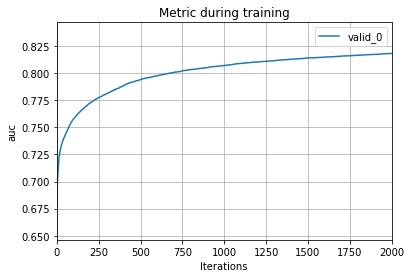

In [371]:
# Eval Virtualization
plt.figure(figsize=(10,4))
lgb.plot_metric(lgbm)

<Figure size 720x288 with 0 Axes>

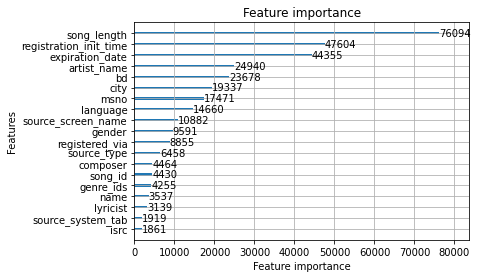

In [372]:
plt.figure(figsize=(10,4))
lgb.plot_importance(lgbm)

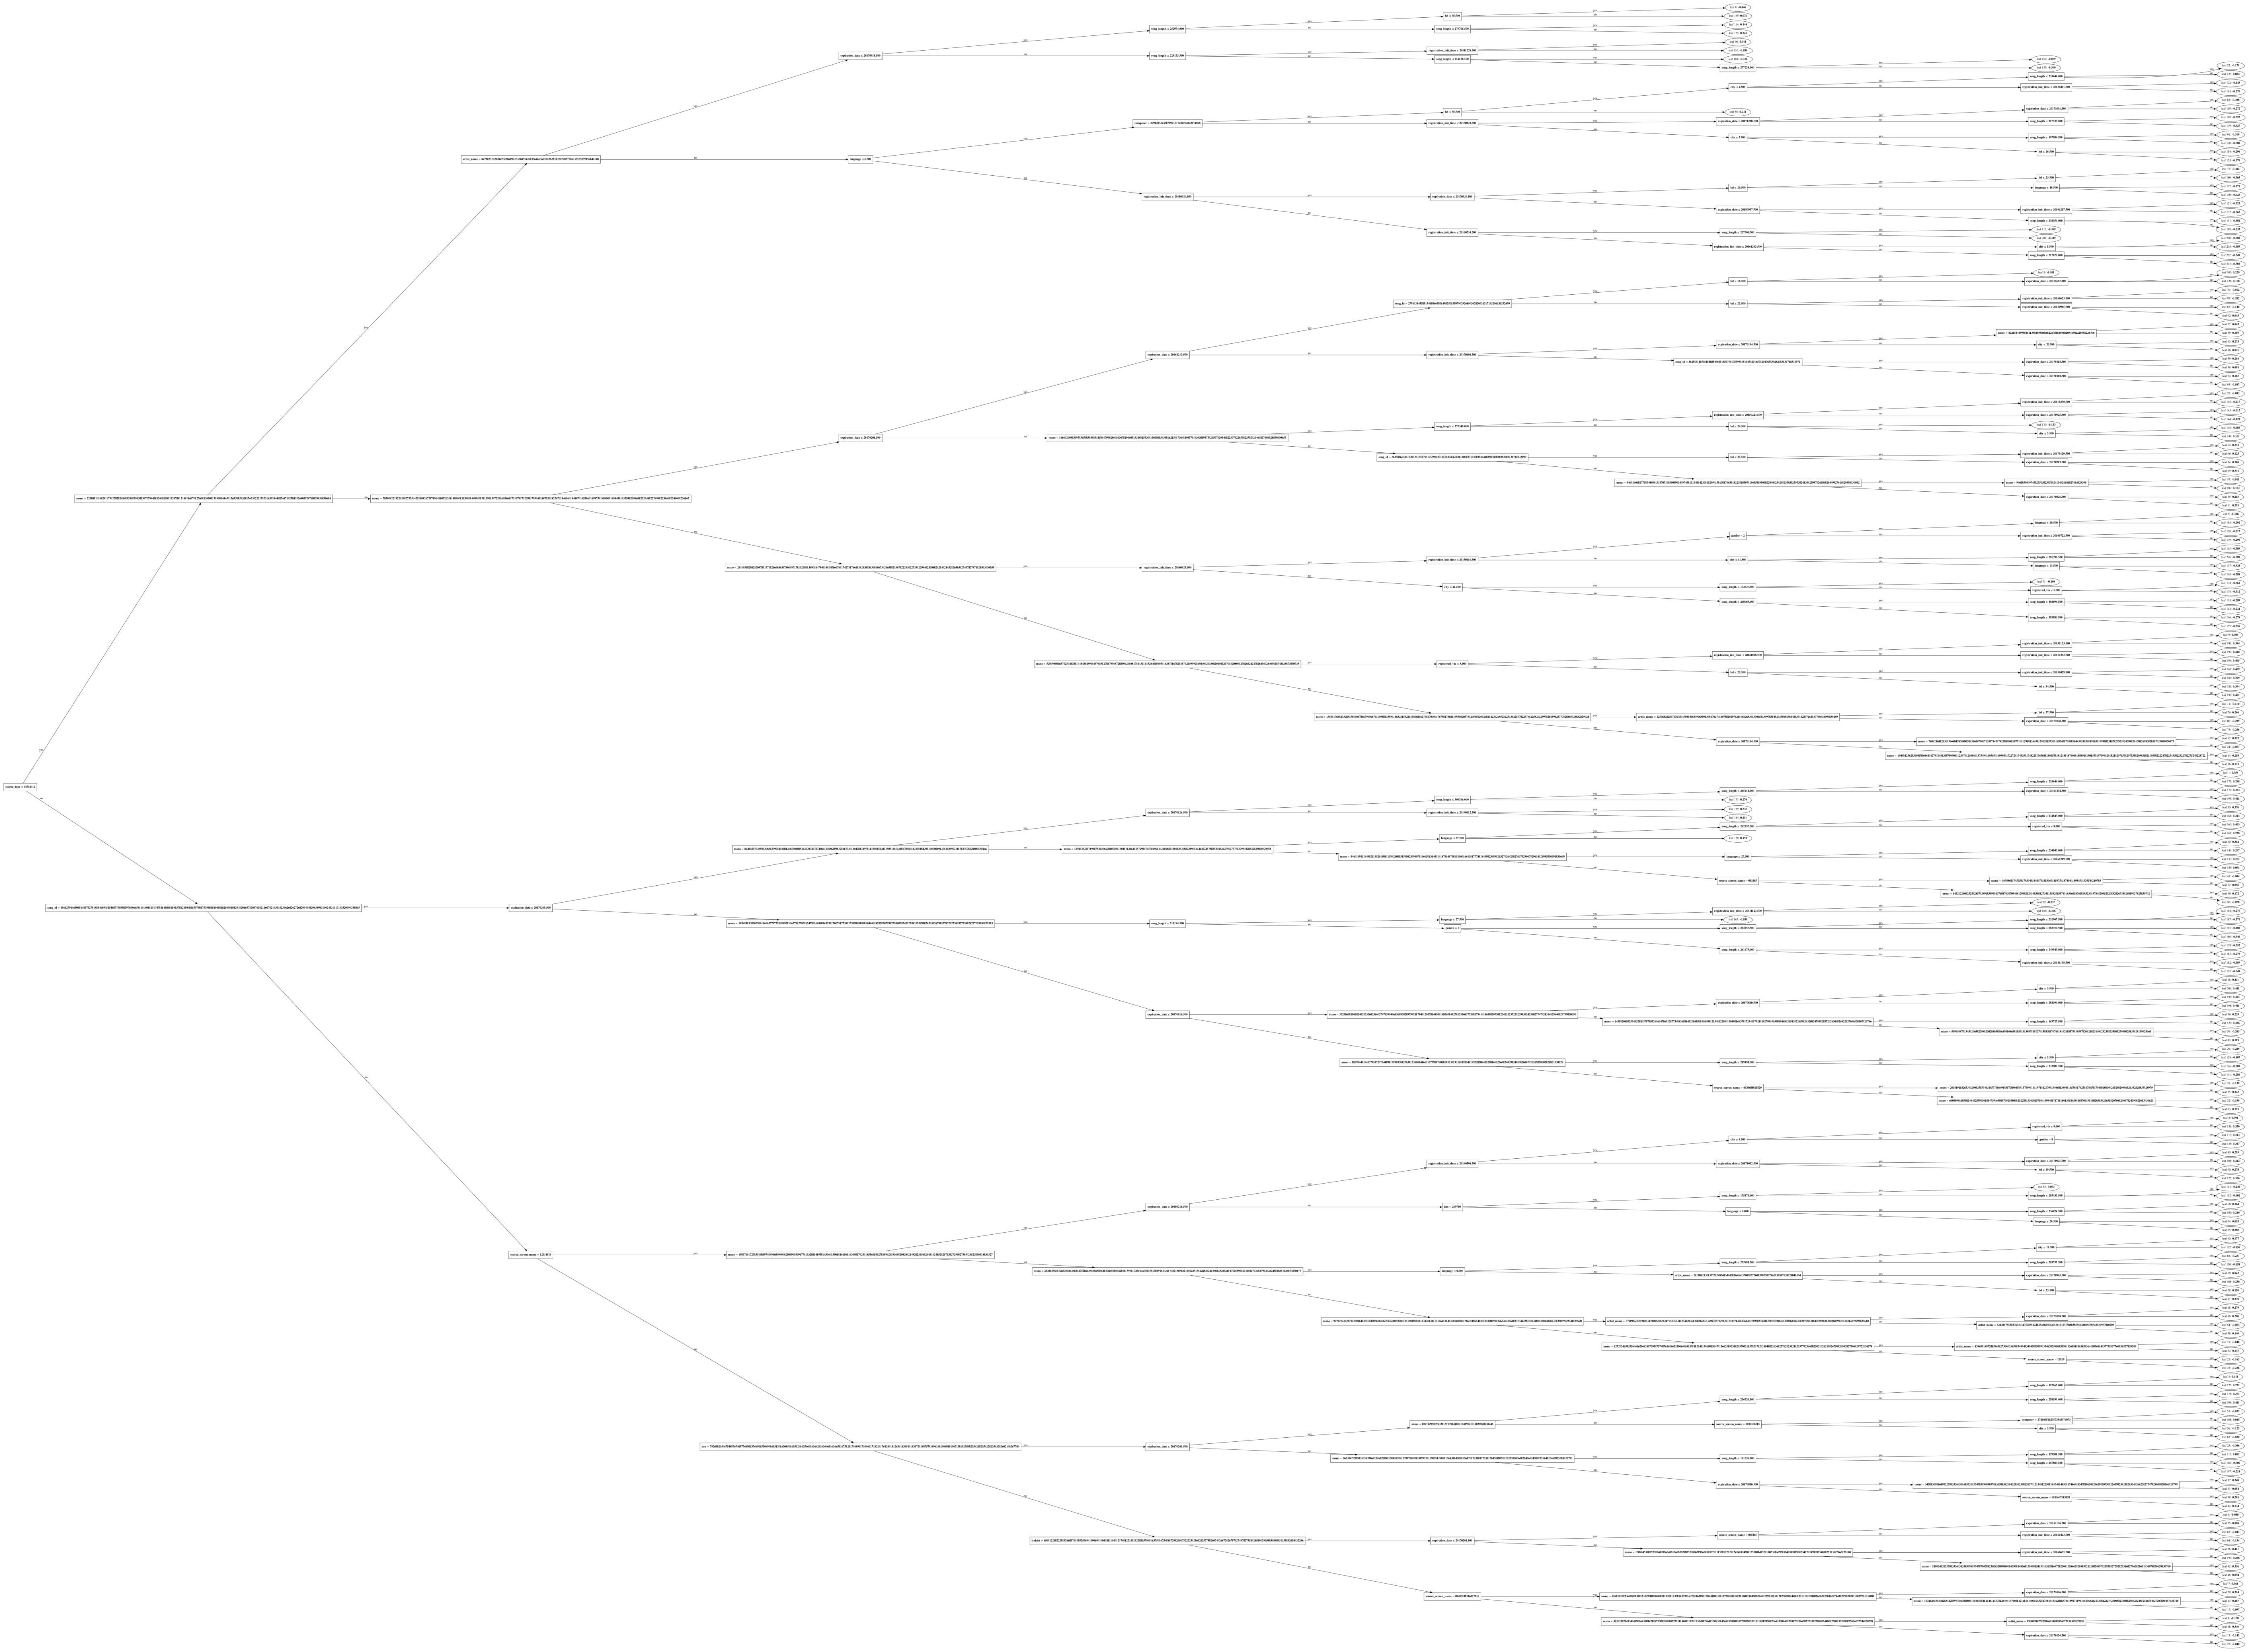

In [377]:
lgb.plot_tree(lgbm,figsize=(100, 100))

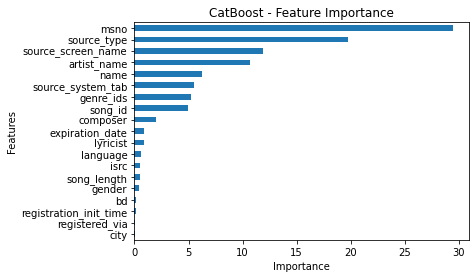

In [380]:
fea_imp = pd.DataFrame({'imp': cb.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(6, 4), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

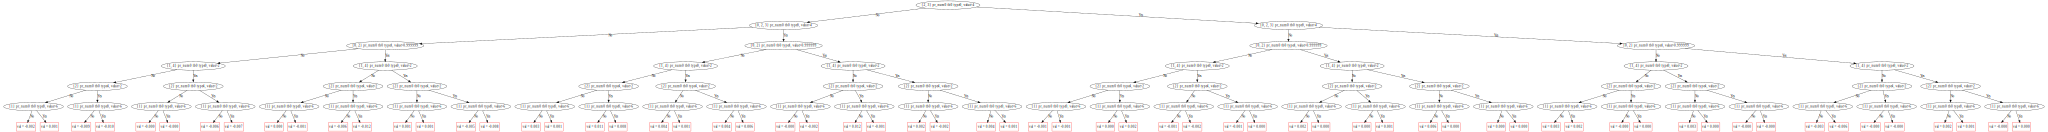

In [383]:
cb.plot_tree(tree_idx=1999, pool=None)